In [2]:
#####################################################################################################################################################################
# xView2                                                                                                                                                            #
# Copyright 2019 Carnegie Mellon University.                                                                                                                        #
# NO WARRANTY. THIS CARNEGIE MELLON UNIVERSITY AND SOFTWARE ENGINEERING INSTITUTE MATERIAL IS FURNISHED ON AN "AS-IS" BASIS. CARNEGIE MELLON UNIVERSITY MAKES NO    #
# WARRANTIES OF ANY KIND, EITHER EXPRESSED OR IMPLIED, AS TO ANY MATTER INCLUDING, BUT NOT LIMITED TO, WARRANTY OF FITNESS FOR PURPOSE OR MERCHANTABILITY,          # 
# EXCLUSIVITY, OR RESULTS OBTAINED FROM USE OF THE MATERIAL. CARNEGIE MELLON UNIVERSITY DOES NOT MAKE ANY WARRANTY OF ANY KIND WITH RESPECT TO FREEDOM FROM PATENT, # 
# TRADEMARK, OR COPYRIGHT INFRINGEMENT.                                                                                                                             #
# Released under a MIT (SEI)-style license, please see LICENSE.md or contact permission@sei.cmu.edu for full terms.                                                 #
# [DISTRIBUTION STATEMENT A] This material has been approved for public release and unlimited distribution.  Please see Copyright notice for non-US Government use  #
# and distribution.                                                                                                                                                 #
# This Software includes and/or makes use of the following Third-Party Software subject to its own license:                                                         #
# 1. SpaceNet (https://github.com/motokimura/spacenet_building_detection/blob/master/LICENSE) Copyright 2017 Motoki Kimura.                                         #
# DM19-0988                                                                                                                                                         #
#####################################################################################################################################################################

In [3]:
# To Run this notebook, start at the first cell with the license information and click run 4 times to show 
# the field blocks, then input the *full path* to the label, and image. Finally, click "Create next input", 
# you'll then see a full sized image with labels overlaid, you will also get different color labels if the
# label file as damage labels under ['features']['xy'][i]['properties']['subtype'] where i is the polygon 
# in the ['xy'] list 

In [4]:
from ipywidgets import Layout
from IPython.display import Javascript, HTML
import ipywidgets as widgets

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

path_to_label = widgets.Text(
    placeholder='Label path here',
    description='Label:',
    disabled=False,
    layout=Layout(width='100%')
)
path_to_image = widgets.Text(
    placeholder='Image path here',
    description='Image:',
    disabled=False,
    layout=Layout(width='100%')
)

In [5]:

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [6]:
display(path_to_label, path_to_image)
button = widgets.Button(description="Create next input")
button.on_click(run_all)
display(button)

Text(value='', description='Label:', layout=Layout(width='100%'), placeholder='Label path here')

Text(value='', description='Image:', layout=Layout(width='100%'), placeholder='Image path here')

Button(description='Create next input', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import json 
from PIL import Image, ImageDraw
from IPython.display import display
from shapely import wkt

In [13]:
# Opening and loading polygons from label json 
path_to_label_value = path_to_label.value
path_to_image_value = path_to_image.value

with open(path_to_label_value, 'rb') as image_json_file:
    image_json = json.load(image_json_file)

In [14]:
coords = image_json['features']['xy']
wkt_polygons = []

for coord in coords:
    if 'subtype' in coord['properties']:
        damage = coord['properties']['subtype']
    else:
        damage = 'no-damage'
    wkt_polygons.append((damage, coord['wkt']))
    
polygons = []

for damage, swkt in wkt_polygons:
    polygons.append((damage, wkt.loads(swkt)))

In [15]:
from PIL import Image
from diffusers.utils import make_image_grid
import rasterio
import numpy as np


def tif_to_pil(tif_path):
    # Open the TIFF file and read the RGB bands
    src = rasterio.open(tif_path)
    red, green, blue = src.read((1, 2, 3))

    # Stack the bands and normalize to 8-bit
    rgb = np.dstack((red, green, blue))
    rgb = (rgb * 255 / rgb.max()).astype("uint8")

    # Convert the NumPy array to a PIL Image
    return Image.fromarray(rgb)

In [16]:
# Loading image
img = tif_to_pil(path_to_image_value)

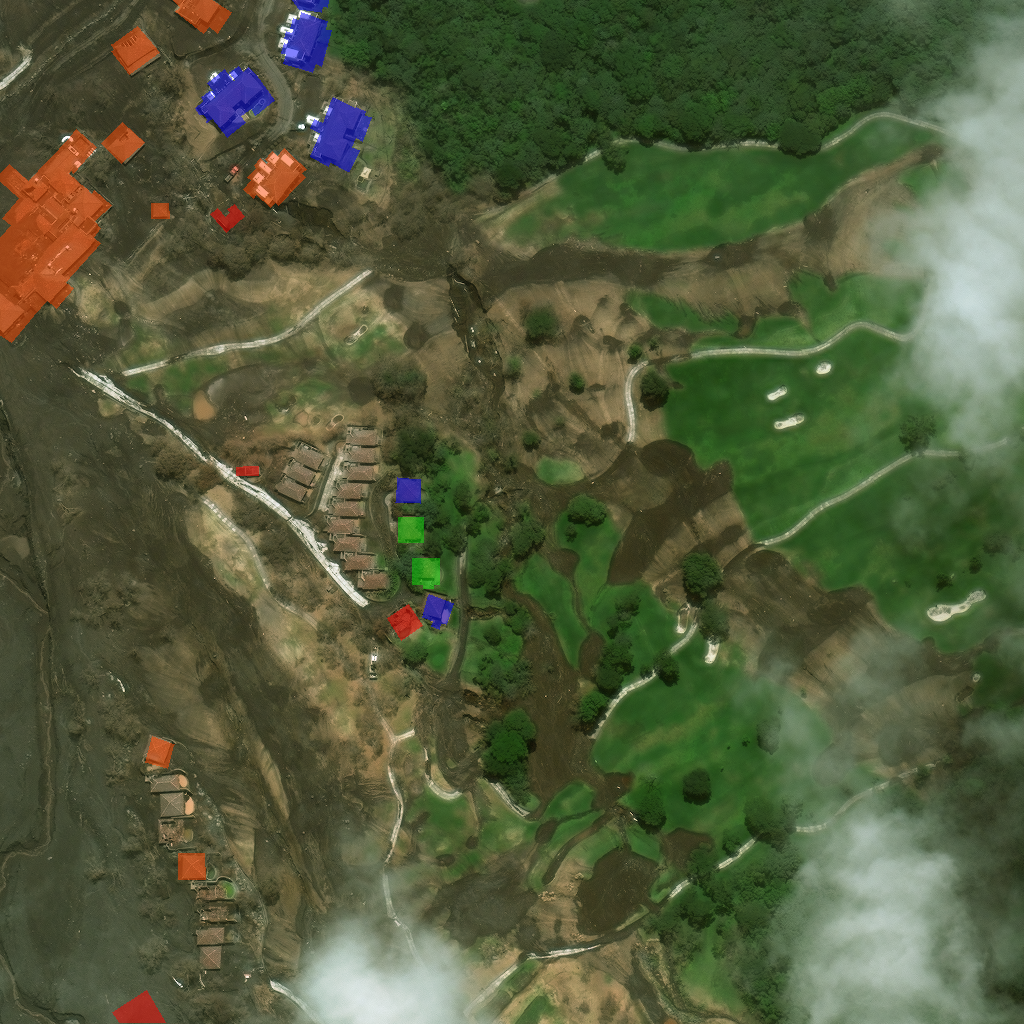

In [17]:
draw = ImageDraw.Draw(img, 'RGBA')

damage_dict = {
    "no-damage": (0, 255, 0, 100),
    "minor-damage": (0, 0, 255, 125),
    "major-damage": (255, 69, 0, 125),
    "destroyed": (255, 0, 0, 125),
    "un-classified": (255, 255, 255, 125)
}

for damage, polygon in polygons:
    x,y = polygon.exterior.coords.xy
    coords = list(zip(x,y))
    draw.polygon(coords, damage_dict[damage])

del draw

display(img)

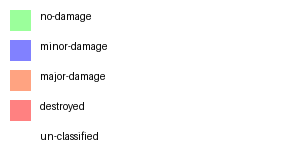

In [18]:
# Add this after the damage_dict definition
from PIL import Image, ImageDraw, ImageFont

# Create legend image
legend_height = 150
legend_width = 300
legend_img = Image.new('RGBA', (legend_width, legend_height), (255, 255, 255, 255))
draw = ImageDraw.Draw(legend_img)

# Font setup (you might need to adjust the font path for your system)
try:
    font = ImageFont.truetype("arial.ttf", 14)
except:
    font = ImageFont.load_default()

# Draw legend items
y_position = 10
box_size = 20
text_offset = 30

for damage_type, color in damage_dict.items():
    # Draw color box
    draw.rectangle([10, y_position, 10 + box_size, y_position + box_size], fill=color)
    # Draw text
    draw.text((10 + text_offset, y_position), damage_type, fill="black", font=font)
    y_position += 30

# Save and display legend
# legend_img.save("damage_legend.png")
display(legend_img)

In [3]:
from PIL import Image
image=Image.open("../data/xbd/images-w512-h512/hurricane-michael/images/hurricane-michael_00000531_post_disaster_part3.png").convert("RGB")
display(image)

OSError: image file is truncated